# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [45]:
medical.shape

(1338, 8)

In [46]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [47]:
medical_mean = np.mean(medical['charges'])
print(medical_mean)
print(np.std(medical['charges'], ddof =1))

13270.422265141257
12110.011236693994


Text(0.5, 1.0, 'Distribution of heights in sample size 10')

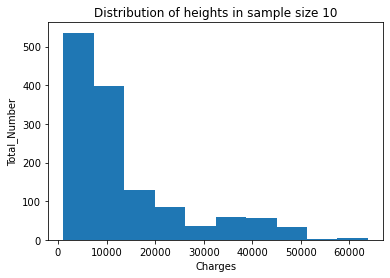

In [48]:
plt.hist(medical['charges'], bins=10)
plt.xlabel('Charges')
plt.ylabel('Total_Number')
plt.title('Distribution of heights in sample size 10')


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 
We could look at the mean(average) and see that, in fact, our mean states that as of right now, the average charge is $1,000 more than the $12,000 threshold we set. 

You would use a hypothesis test with the null being the average (mean < 12,000). If you find that with 95% certainty that is not the case, then you'd 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

The most appropriate would be a one tailed test because we are just concerned that the average charge would be greater than the $12,000  we set. 

In [49]:
critical =1.96*((np.std(medical['charges'], ddof =1)/np.sqrt(len(medical['charges']))))
print(critical)

648.8922104587372


In [50]:
print(medical_mean+critical, medical_mean-critical)

13919.314475599993 12621.53005468252


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
The Null Hypothesis is that patients without insurance get charged less than the average of $12,000.
The alternative states that patients get charged a statistically insignificant amount compared to the other.

The assumptions is that the sample is representative of the population as a whole, therefore, can give us some degree of confidence when we use the sample to make inferences. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [65]:
null_mean_with_insurance = np.mean(medical['charges'][medical['insuranceclaim'] == 1])
null_std_with_insurance = np.std(medical['charges'][medical['insuranceclaim'] == 1], ddof=1)

print(null_mean_with_insurance, null_std_with_insurance)

16423.928276537663 14045.928418802127


In [66]:
null_mean_WO_insurance = np.mean(medical['charges'][medical['insuranceclaim'] == 0])
null_std_WO_insurance = np.std(medical['charges'][medical['insuranceclaim'] == 0], ddof = 1)
print(null_mean_WO_insurance, null_std_WO_insurance)

8821.421892306294 6446.510126811736


In [67]:
n_m = null_mean_with_insurance
n_std = null_std_with_insurance 
a_mean = null_mean_WO_insurance
a_std = null_std_WO_insurance

pooled_std = np.sqrt(((n_m-1)*n_std**2 +(a_mean-1)*a_std**2)/(n_m+a_mean-2))
print(pooled_std)

11952.965751481195


In [71]:
sp = (np.sqrt(((no-1)*n_std**2 +(nl-1)*a_std**2)/(no+nl-2)))
print(sp)

9951.312958496388


In [81]:
t = ((medical_mean-12000)/((sp)*np.sqrt((1/no)+(1/nl))))
print(t)

2.8373069078885007


In [79]:
no = len((medical['charges'][medical['insuranceclaim'] == 1]))
nl = len(medical['charges'])
print(len(medical['charges'][medical['insuranceclaim'] == 0]))

555


Looking at the t-value chart, it appears that we fall in between 99-99.8% confident that given our normal mean and the value of 12,000, that those without insurance do pay less that those with insurance!

__A:__ 

In [51]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


So without getting too far into the weeds, we have to see that the difference between the patients charged with and without insurance is almost 50% increase. That's pretty crazy! But is it statstically significant?

In [59]:
print(null_mean)

age                  40.551724
sex                   0.518519
bmi                  32.635179
children              0.679438
smoker                0.318008
region                1.535121
charges           16423.928277
insuranceclaim        1.000000
dtype: float64


In [90]:
stats.ttest_ind((medical['charges'][medical['insuranceclaim'] == 1]), medical['charges'][medical['insuranceclaim'] == 0])

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [91]:
stats.ttest_ind(medical['charges'], medical['charges'][medical['insuranceclaim'] == 0])

Ttest_indResult(statistic=8.186328357598098, pvalue=4.894429536918297e-16)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test